#Load Data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df=pd.read_csv('/content/drive/MyDrive/UAP/student-depression-dataset/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [26]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [27]:
df[df.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


**There are no duplicates or null values**

In [28]:
df.drop(columns=['id'],axis= 0, inplace=True)

In [29]:
df.loc[df['Gender']=='Male','Gender']=0
df.loc[df['Gender']=='Female','Gender']=1

In [30]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [31]:
df.City.value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [32]:
deletecities=df.City.value_counts()
deletecities=pd.DataFrame(deletecities).reset_index()
deletecities=deletecities[deletecities['count']<5]
list=deletecities['City']
list

,City
30,Saanvi
31,Bhavna
32,City
33,Harsha
34,Kibara
35,Nandini
36,Nalini
37,Mihir
38,Nalyan
39,M.Com


In [14]:
for i in list:
    df=df.drop(df.loc[df['City']==i].index)

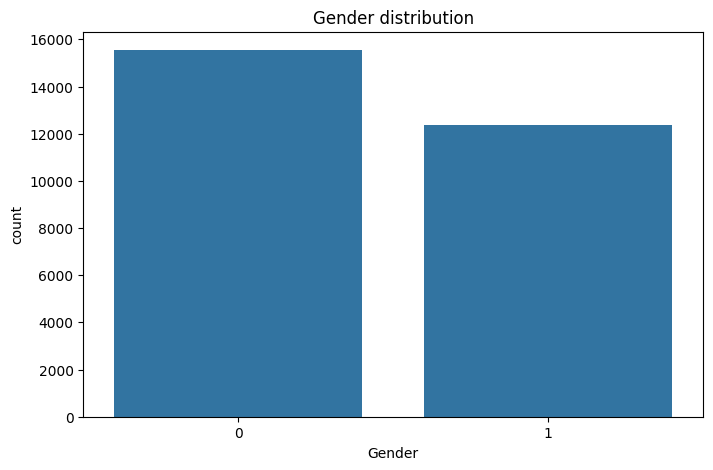

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Gender'])
plt.title('Gender distribution')
plt.show()

Text(0.5, 1.0, 'Gender distribution')

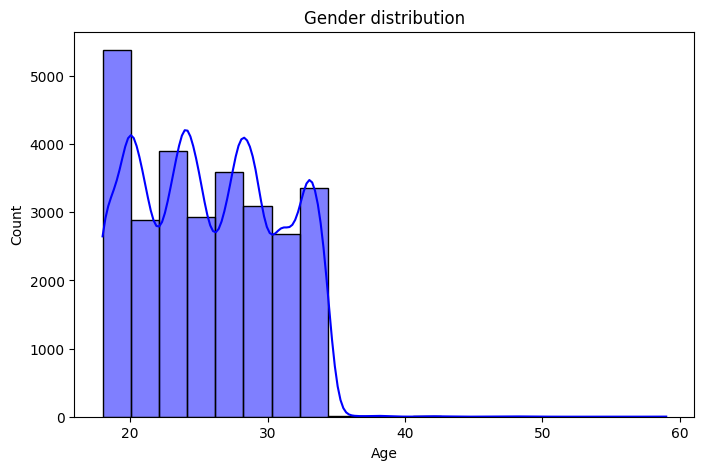

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(x=df['Age'],bins= 20,color='blue', kde=True)
plt.title('Gender distribution')

<ipython-input-17-3686f4974381>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['CGPA'], palette='muted')


Text(0.5, 1.0, 'CGPA distribution by gender')

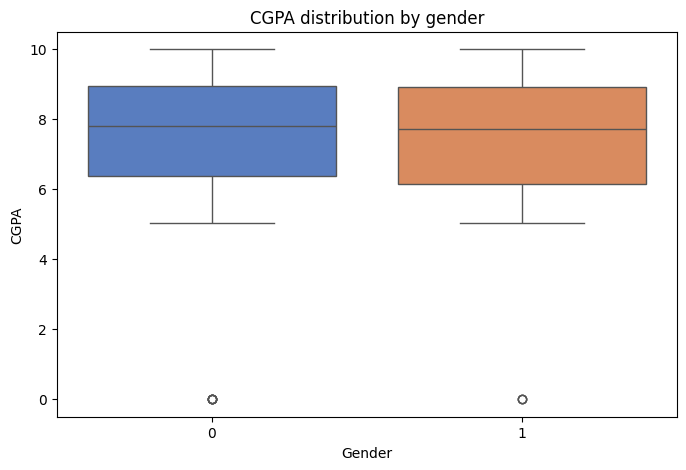

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Gender'], y=df['CGPA'], palette='muted')
plt.title('CGPA distribution by gender')

Text(0.5, 1.0, 'Study Satisfaction vs CGPA by Gender')

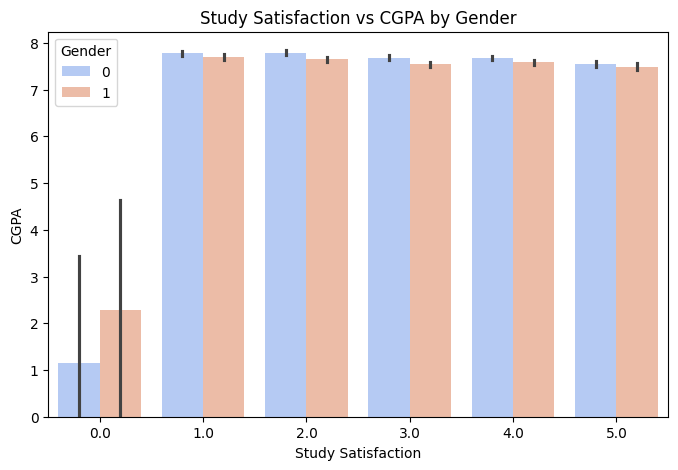

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Study Satisfaction'], y=df['CGPA'], hue=df['Gender'], palette='coolwarm')
plt.title('Study Satisfaction vs CGPA by Gender')

**Data Preprocessing**

In [19]:
df['Profession'].value_counts()

,count
Profession,
Student,27844
Architect,8
Teacher,6
Digital Marketer,3
Content Writer,2
Chef,2
Doctor,2
Pharmacist,2
Civil Engineer,1


In [34]:
df=df.drop('City', axis=1)
df=df.drop('Profession', axis=1)
df=df.drop('Job Satisfaction', axis=1)
df=df.drop('Degree', axis=1)

In [21]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,8303
7-8 hours,7336
5-6 hours,6177
More than 8 hours,6041
Others,18


In [35]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10317
Moderate,9921
Healthy,7651
Others,12


In [36]:
df = df.drop(df[df['Sleep Duration'] == 'Others'].index)
df = df.drop(df[df['Dietary Habits'] == 'Others'].index)

In [37]:
mapping = {'Less than 5 hours': 1, '7-8 hours': 2, '5-6 hours': 3, 'More than 8 hours': 4}
df['Sleep Duration'] = df['Sleep Duration'].map(mapping)

In [38]:
mapping = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
df['Dietary Habits'] = df['Dietary Habits'].map(mapping)

In [39]:
mapping = {'Yes': 1, 'No': 0}
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(mapping)

mapping = {'Yes': 1, 'No': 0}
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(mapping)

In [40]:
df['Gender']=df['Gender'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27871 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27871 non-null  int64  
 1   Age                                    27871 non-null  float64
 2   Academic Pressure                      27871 non-null  float64
 3   Work Pressure                          27871 non-null  float64
 4   CGPA                                   27871 non-null  float64
 5   Study Satisfaction                     27871 non-null  float64
 6   Sleep Duration                         27871 non-null  int64  
 7   Dietary Habits                         27871 non-null  int64  
 8   Have you ever had suicidal thoughts ?  27871 non-null  int64  
 9   Work/Study Hours                       27871 non-null  float64
 10  Financial Stress                       27868 non-null  float64
 11  Family 

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>,
        <Axes: title={'center': 'Work Pressure'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Dietary Habits'}>],
       [<Axes: title={'center': 'Have you ever had suicidal thoughts ?'}>,
        <Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Financial Stress'}>,
        <Axes: title={'center': 'Family History of Mental Illness'}>],
       [<Axes: title={'center': 'Depression'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

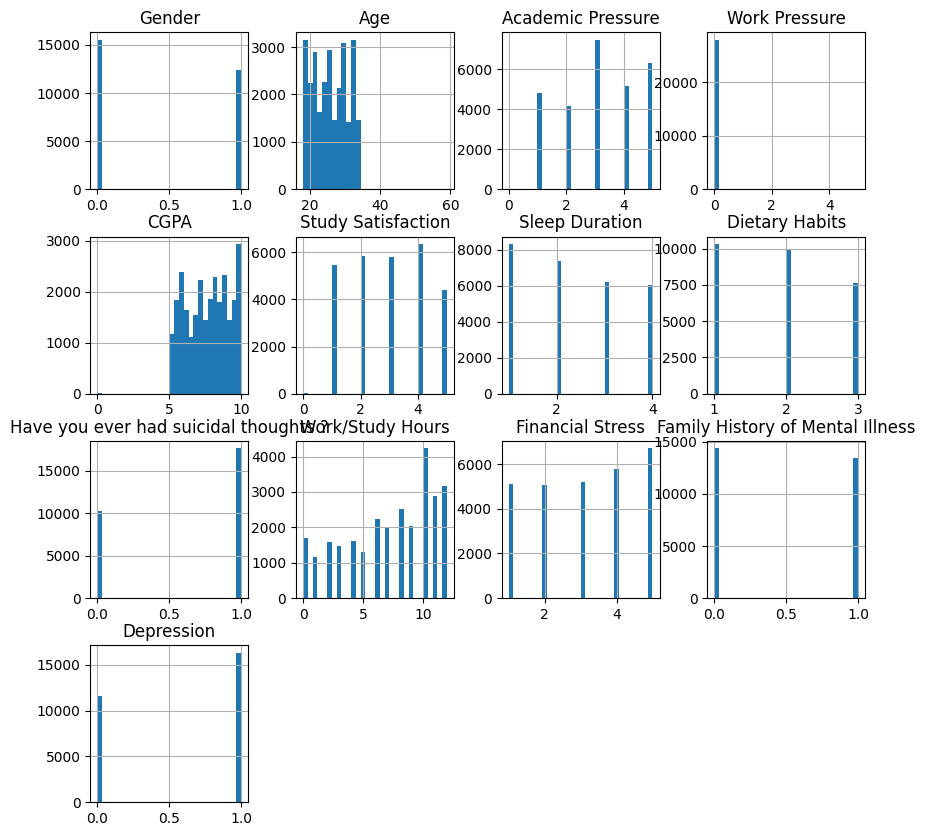

In [42]:
df.hist(bins=30, figsize=(10,10))

In [43]:
df=df.dropna()

In [44]:
X=df.drop(columns=['Depression'])
y=df['Depression']

In [45]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2, random_state=25)

In [47]:
print("Features (X):", X.columns.tolist())
print("Target (y):", y.name)

Features (X): ['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']
Target (y): Depression


#Model

## **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=25)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

In [50]:
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier Results:
Accuracy: 0.849659131682813
Confusion Matrix:
[[1850  451]
 [ 387 2886]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2301
           1       0.86      0.88      0.87      3273

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



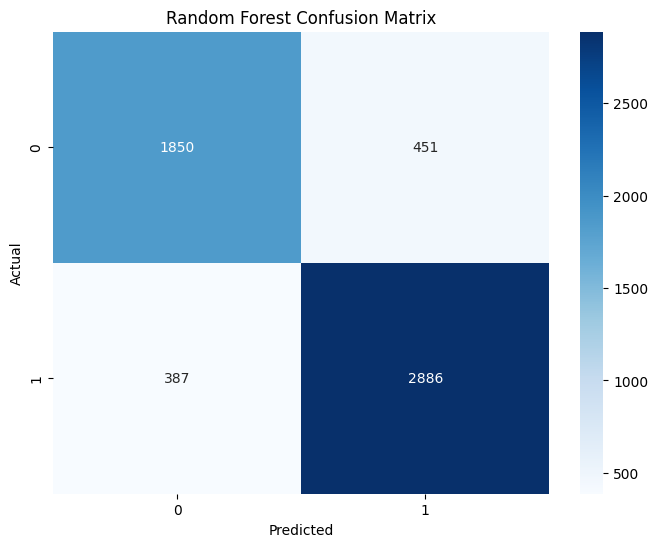

In [51]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **FNN**

In [52]:
# Fully Connected Neural Network (FNN)
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = fnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8072 - loss: 0.4316 - val_accuracy: 0.8426 - val_loss: 0.3653
Epoch 2/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8394 - loss: 0.3728 - val_accuracy: 0.8419 - val_loss: 0.3615
Epoch 3/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8454 - loss: 0.3697 - val_accuracy: 0.8390 - val_loss: 0.3609
Epoch 4/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.3608 - val_accuracy: 0.8421 - val_loss: 0.3654
Epoch 5/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8470 - loss: 0.3537 - val_accuracy: 0.8388 - val_loss: 0.3609
Epoch 6/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8517 - loss: 0.3466 - val_accuracy: 0.8397 - val_loss: 0.3622
Epoch 7/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8502 - loss: 0.3530 - val_accuracy: 0.8394 - val_loss: 0.3614
Epoch 8/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8447 - loss: 0.3595 - val_accuracy: 0.

In [55]:
fnn_y_pred = (fnn_model.predict(X_test) > 0.5).astype("int32")

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [56]:
print("\nFully Connected Neural Network Results:")
print("Accuracy:", accuracy_score(y_test, fnn_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, fnn_y_pred))
print("Classification Report:")
print(classification_report(y_test, fnn_y_pred))


Fully Connected Neural Network Results:
Accuracy: 0.8559382848941515
Confusion Matrix:
[[1837  464]
 [ 339 2934]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2301
           1       0.86      0.90      0.88      3273

    accuracy                           0.86      5574
   macro avg       0.85      0.85      0.85      5574
weighted avg       0.86      0.86      0.86      5574



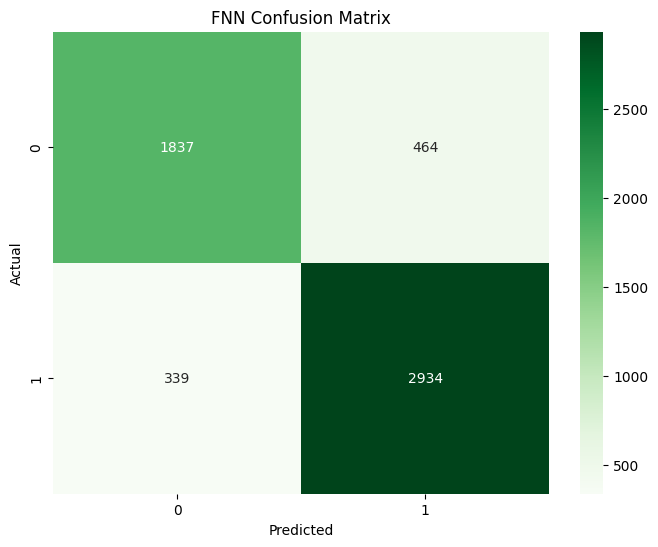

In [60]:
# Plot confusion matrix for FNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, fnn_y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('FNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

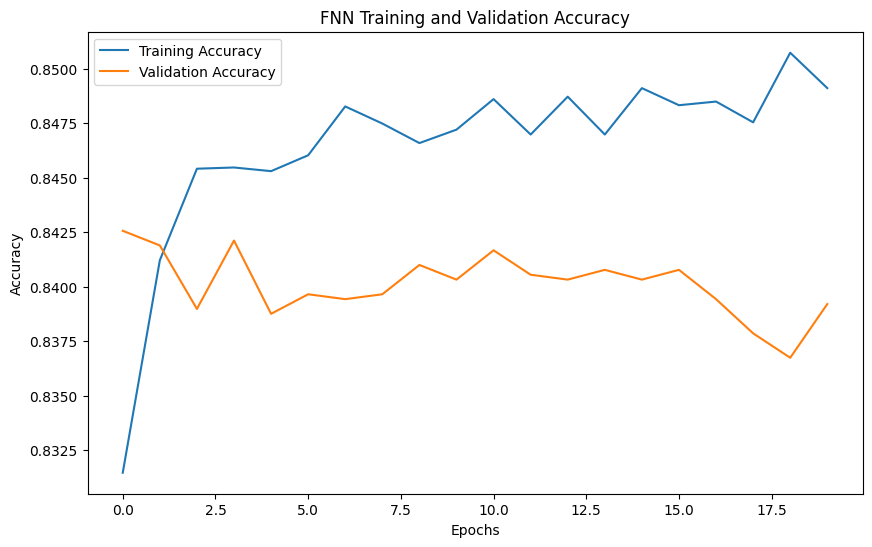

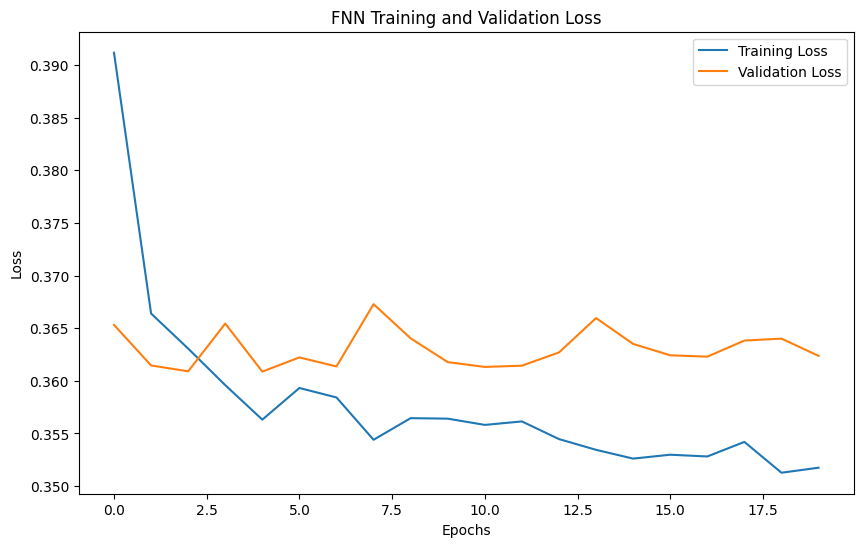

In [61]:
# Plot training history for FNN (Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training history for FNN (Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('FNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
import pickle
from tensorflow.keras.models import save_model
import tensorflow as tf

# Menyimpan model Random Forest
# tf.keras.models.save_model(rf_model, 'random_forest_model.h5') # Removed this line

with open('random_forest_model.pkl', 'wb') as file: # Changed to pickle
    pickle.dump(rf_model, file)

# Menyimpan model FNN
fnn_model.save('fnn_model.h5')